# Robust Scaler
### It is used to scale the feature to median  and quantiles
### Scaling using median and quantiles consists of subtracting the median to all the observations, and then dividing by the interquantile  difference. The interquantile difference is the difference between the 75th and 25th quantile:
### IQR = 75th quantile - 25th quantile
### x_scaled = (X-X.median)/IQR

example
#### 0,1,2,3,4,5,6,7,8,9,10
#### 9-90 percentile ---> 90% of all values in this group are less than 9
#### 1-10 percentile ---> 10% of all values in this group are less than 1

In [2]:
df = pd.read_csv("titanic.csv", usecols=["Survived", "Fare", "Age", "Pclass"])

In [10]:
df["Pclass"].median()

3.0

In [3]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [8]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_robust_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

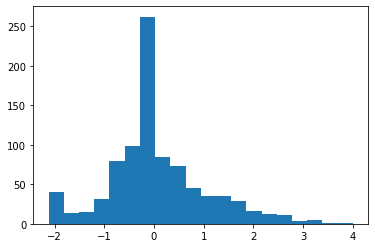

In [13]:
plt.hist(df_robust_scaled['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

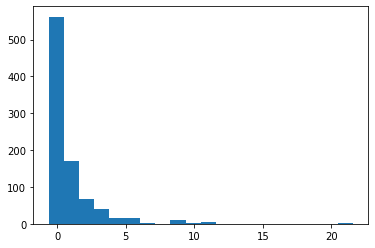

In [14]:
plt.hist(df_robust_scaled['Fare'],bins=20)

<AxesSubplot:xlabel='Age'>

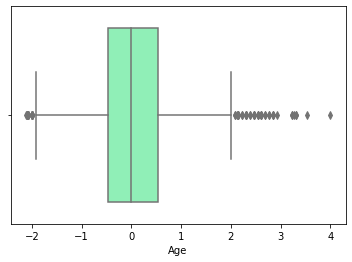

In [15]:
sns.boxplot(x="Age", data=df_robust_scaled, palette = "rainbow")

# next technique is Gaussain Transformation